# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [2]:
df = pd.read_csv("diabetes.csv")

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [3]:
# df.describe()
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [4]:
# dropping certain columns that don't have any impact on the outcome(having diabities).
df.drop("Pregnancies", axis=1, inplace=True)
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.600,0.627,50,1
1,85,66,29,0,26.600,0.351,31,0
2,183,64,0,0,23.300,0.672,32,1
3,89,66,23,94,28.100,0.167,21,0
4,137,40,35,168,43.100,2.288,33,1
5,116,74,0,0,25.600,0.201,30,0
6,78,50,32,88,31.000,0.248,26,1
7,115,0,0,0,35.300,0.134,29,0
8,197,70,45,543,30.500,0.158,53,1
9,125,96,0,0,0.000,0.232,54,1


Step 4 - Write code to display info of dataset and check shape of dataset.

In [5]:
df.info()
print()
print("how many missing (NaN) values are in each column of the DataFrame")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB

how many missing (NaN) values are in each column of the DataFrame


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Step 5 - Write code to clean data

In [6]:
# check if there are zeroes in the DataFrame and which columns have them
(df == 0).sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
# one way of handling these null values is to fill those values with the mean value of the whole column.
# Replace 0s with NaN in specific columns
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Fill NaN with column means
df[cols_to_replace] = df[cols_to_replace].fillna(df[cols_to_replace].mean())

# Check for any remaining 0s
(df == 0).sum()

Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### Step #6 - Split data into training and testing sets ( 80: 20 ratio)

In [8]:
# Split features and target
X = df.drop('Outcome', axis=1) #features
y = df['Outcome']  #target variable

# Train-test split
# 20% test size and 80% train size.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(df))

614 154 768


#### **Step #7: Initialize your model**




In [9]:
# we are using the Gaussian Naive Bayes model.
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [10]:
# fitting the model
model.fit(X_train, y_train)

# testing on the testing data
model.score(X_test, y_test)



0.7532467532467533

Step 9 - Predict using model on test data

In [18]:
y_pred = np.array(model.predict(X_test))
pred_probability = np.array(model.predict_proba(X_test)) # calculating the probabilities

print(y_pred[:6])
for i in range(0, 6):
    print(pred_probability[i][0], end=", ")

[0 0 0 0 1 0]
0.8307648339323276, 0.8840204198860998, 0.9594939386443437, 0.8726317153724374, 0.4397573678002371, 0.5272738071872277, 

Step 10 -  Find accuracy of model

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


Step 11 - Confusion Matrix

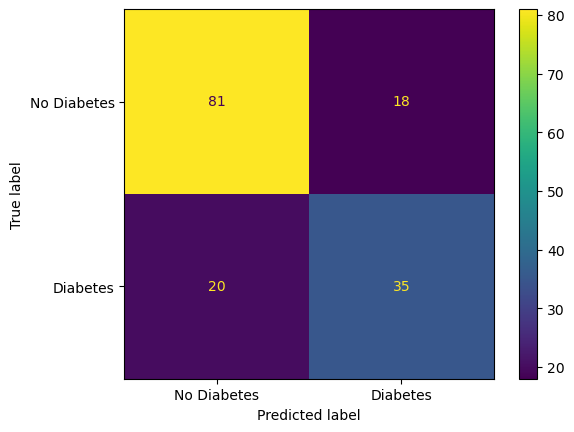

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Diabetes", "Diabetes"])

cm_display.plot()
plt.show()

##### ** Step 12 - Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
```

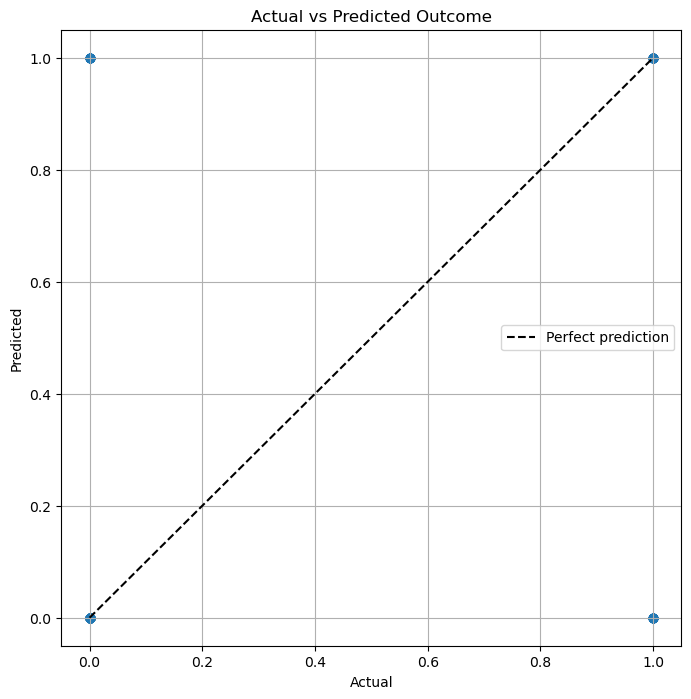

In [17]:
# usually used for regression models
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Perfect prediction")\

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Outcome")


plt.legend()
plt.grid(True)
plt.show()

#### **Step #13: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [16]:
# these are mostly used to evaluate regression, rather than classification
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

Mean Squared Error (MSE): 0.2468
R2 Score: -0.0747
